In [1]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
sns.set_theme(style="darkgrid")
sns.set({"figure.figsize":(17,8)})
sns.set(font_scale = 1.15)
import plotly.express as px
import seaborn as sns
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt


In [2]:
# Nos traemos el data set 
f = pd.read_csv("../../Raw Data/players_22.csv",encoding = "ISO-8859-1")

/Users/macniacos/Desktop/Ironhack/anaconda3/envs/ironhack/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3417: DtypeWarning:

Columns (25,108) have mixed types.Specify dtype option on import or set low_memory=False.



In [3]:
#Seleccionamos las columnas que nos interesan
selected_columns = f[["short_name","player_positions","overall","nationality_name","age","dob","league_name", "height_cm","weight_kg",]]
df = selected_columns.copy()
df.head(3)

,short_name,player_positions,overall,nationality_name,age,dob,league_name,height_cm,weight_kg
0,L. Messi,"RW, ST, CF",93,Argentina,34,1987-06-24,French Ligue 1,170,72
1,R. Lewandowski,ST,92,Poland,32,1988-08-21,German 1. Bundesliga,185,81
2,Cristiano Ronaldo,"ST, LW",91,Portugal,36,1985-02-05,English Premier League,187,83


In [4]:
df['year'] = pd.DatetimeIndex(df['dob']).year
df['month'] = pd.DatetimeIndex(df['dob']).month
df['day'] = pd.DatetimeIndex(df['dob']).day
df.head(3)

,short_name,player_positions,overall,nationality_name,age,dob,league_name,height_cm,weight_kg,year,month,day
0,L. Messi,"RW, ST, CF",93,Argentina,34,1987-06-24,French Ligue 1,170,72,1987,6,24
1,R. Lewandowski,ST,92,Poland,32,1988-08-21,German 1. Bundesliga,185,81,1988,8,21
2,Cristiano Ronaldo,"ST, LW",91,Portugal,36,1985-02-05,English Premier League,187,83,1985,2,5


In [5]:
df.drop(df[(df['nationality_name'] == "Brazil") & (df['month'] == 2)  & (df['day'] == 29)].index, inplace=True)

In [6]:
def trimestres(row):
    if row['month'] < 4 :
        return 1
    elif row['month'] < 7:
        return 2
    elif row['month'] < 10:
        return 3
    else:
        return 4     

In [7]:
df['trimestre'] = df.apply (lambda month: trimestres(month), axis=1)

In [8]:
df.head(3)

,short_name,player_positions,overall,nationality_name,age,dob,league_name,height_cm,weight_kg,year,month,day,trimestre
0,L. Messi,"RW, ST, CF",93,Argentina,34,1987-06-24,French Ligue 1,170,72,1987,6,24,2
1,R. Lewandowski,ST,92,Poland,32,1988-08-21,German 1. Bundesliga,185,81,1988,8,21,3
2,Cristiano Ronaldo,"ST, LW",91,Portugal,36,1985-02-05,English Premier League,187,83,1985,2,5,1


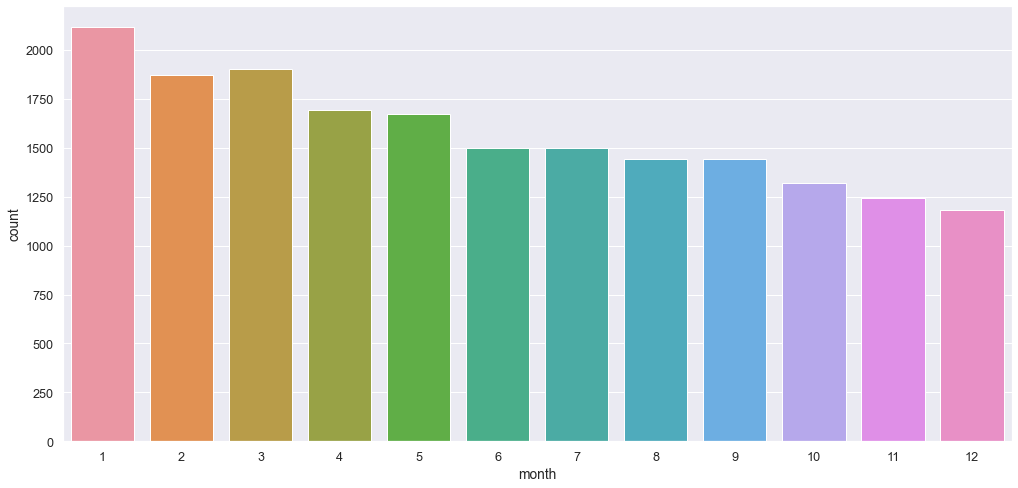

In [9]:
ax = sns.countplot(x="month", data=df)

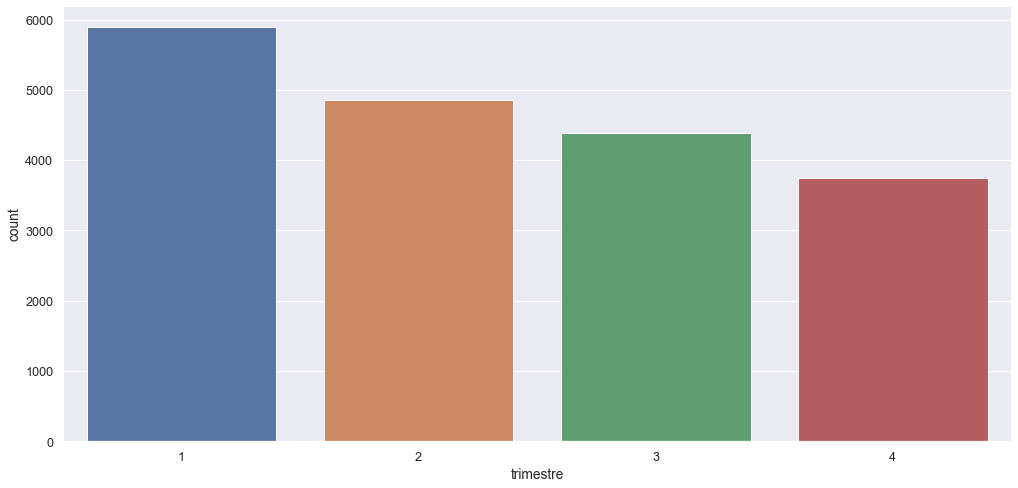

In [10]:
ax = sns.countplot(x="trimestre", data=df)

In [11]:
spain = df.loc[df["nationality_name"] == "Spain"]
spain.head(3)

,short_name,player_positions,overall,nationality_name,age,dob,league_name,height_cm,weight_kg,year,month,day,trimestre
22,Sergio Ramos,CB,88,Spain,35,1986-03-30,French Ligue 1,184,82,1986,3,30,1
50,Jordi Alba,"LB, LM",86,Spain,32,1989-03-21,Spain Primera Division,170,68,1989,3,21,1
51,Thiago,"CM, CDM",86,Spain,30,1991-04-11,English Premier League,174,70,1991,4,11,2


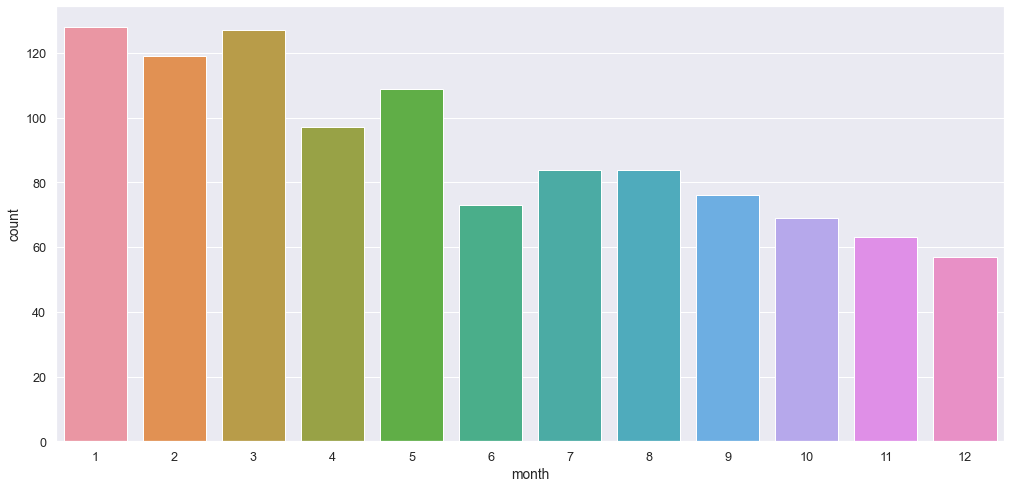

In [45]:
ax = sns.countplot(x="month", data=spain)

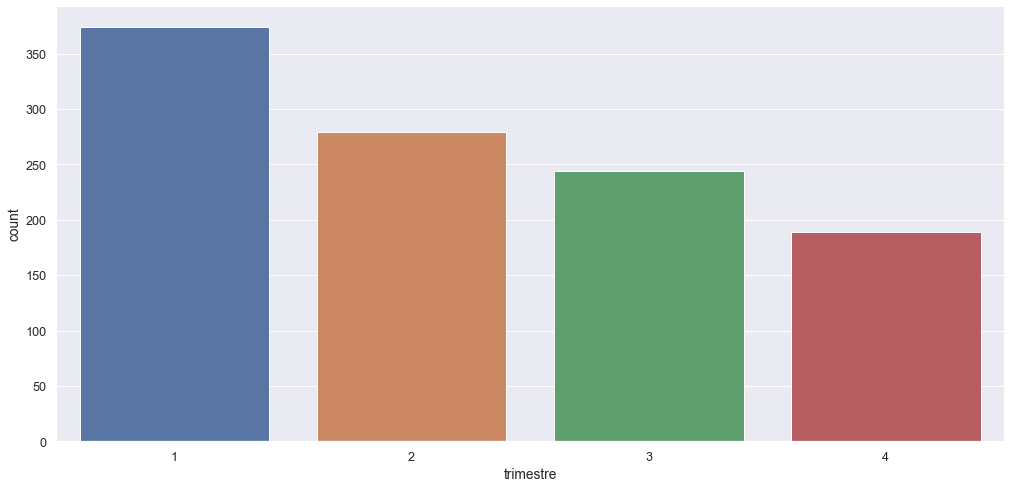

In [12]:
ax = sns.countplot(x="trimestre", data=spain)

In [13]:
spain.to_csv('../../Data/spainf.csv', encoding='utf-8')

In [14]:
england = df.loc[df["nationality_name"] == "England"]
england.head(3)

,short_name,player_positions,overall,nationality_name,age,dob,league_name,height_cm,weight_kg,year,month,day,trimestre
9,H. Kane,ST,90,England,27,1993-07-28,English Premier League,188,89,1993,7,28,3
27,R. Sterling,"LW, RW",88,England,26,1994-12-08,English Premier League,170,69,1994,12,8,4
44,T. Alexander-Arnold,RB,87,England,22,1998-10-07,English Premier League,180,69,1998,10,7,4


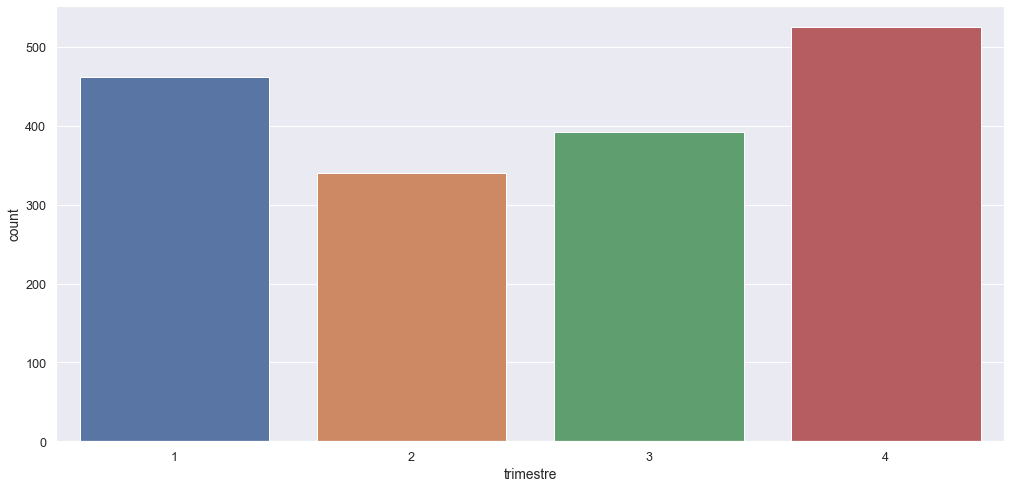

In [15]:
ax = sns.countplot(x="trimestre", data=england)

In [16]:
england.to_csv('../../Data/englandf.csv', encoding='utf-8')

In [17]:
englandn = df.loc[df["nationality_name"] == "England"]

In [18]:
def normalize(row):
    if row['month'] == 9 :
        return 1
    if row['month'] == 10 :
        return 2
    if row['month'] == 11 :
        return 3
    if row['month'] == 12 :
        return 4
    if row['month'] == 1 :
        return 5
    if row['month'] == 2 :
        return 6
    if row['month'] == 3 :
        return 7
    if row['month'] == 4 :
        return 8
    if row['month'] == 5 :
        return 9
    if row['month'] == 6 :
        return 10
    if row['month'] == 7 :
        return 11
    if row['month'] == 8 :
        return 12   

In [19]:
englandn['month'] = englandn.apply (lambda month: normalize(month), axis=1)
englandn['trimestre'] = englandn.apply (lambda month: trimestres(month), axis=1)

<ipython-input-19-25a49757e56b>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-19-25a49757e56b>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [20]:
englandn.head(3)

,short_name,player_positions,overall,nationality_name,age,dob,league_name,height_cm,weight_kg,year,month,day,trimestre
9,H. Kane,ST,90,England,27,1993-07-28,English Premier League,188,89,1993,11,28,4
27,R. Sterling,"LW, RW",88,England,26,1994-12-08,English Premier League,170,69,1994,4,8,2
44,T. Alexander-Arnold,RB,87,England,22,1998-10-07,English Premier League,180,69,1998,2,7,1


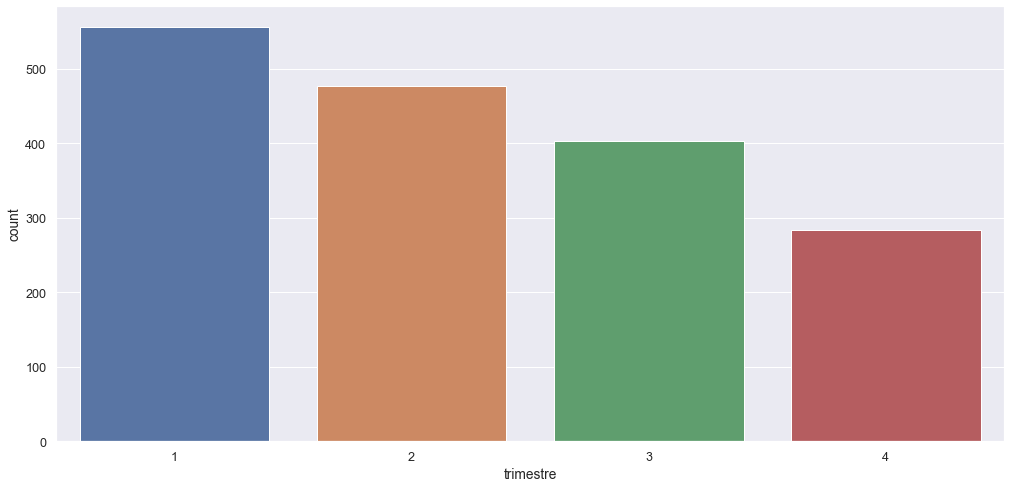

In [21]:
ax = sns.countplot(x="trimestre", data=englandn)

In [22]:
englandn.to_csv('../../Data/englandnf.csv', encoding='utf-8')

In [23]:
france = df.loc[df["nationality_name"] == "France"]
france.head(3)

,short_name,player_positions,overall,nationality_name,age,dob,league_name,height_cm,weight_kg,year,month,day,trimestre
6,K. MbappÃ©,"ST, LW",91,France,22,1998-12-20,French Ligue 1,182,73,1998,12,20,4
10,N. KantÃ©,"CDM, CM",90,France,30,1991-03-29,English Premier League,168,70,1991,3,29,1
11,K. Benzema,"CF, ST",89,France,33,1987-12-19,Spain Primera Division,185,81,1987,12,19,4


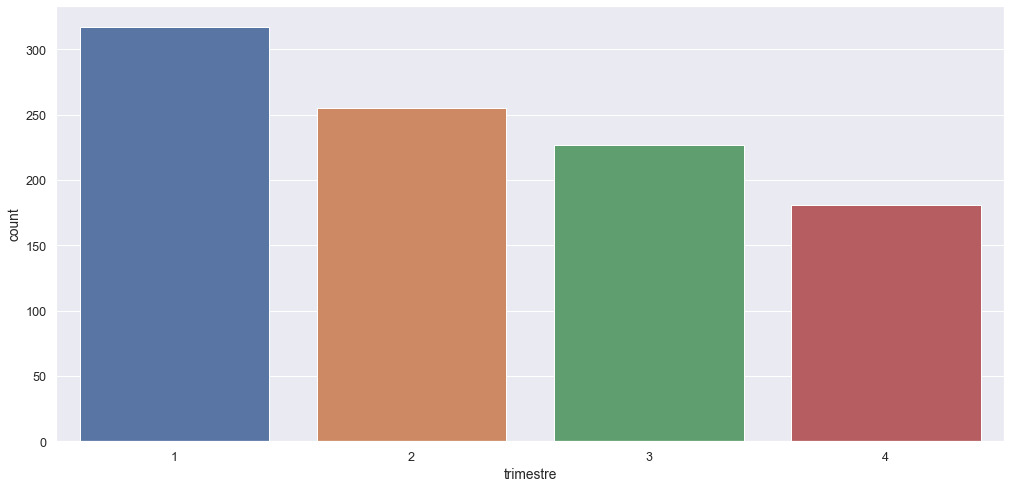

In [24]:
ax = sns.countplot(x="trimestre", data=france)

In [25]:
france.to_csv('../../Data/france.csv', encoding='utf-8')

In [26]:
germany = df.loc[df["nationality_name"] == "Germany"]
germany.head(3)

,short_name,player_positions,overall,nationality_name,age,dob,league_name,height_cm,weight_kg,year,month,day,trimestre
7,M. Neuer,GK,90,Germany,35,1986-03-27,German 1. Bundesliga,193,93,1986,3,27,1
8,M. ter Stegen,GK,90,Germany,29,1992-04-30,Spain Primera Division,187,85,1992,4,30,2
19,J. Kimmich,"CDM, RB",89,Germany,26,1995-02-08,German 1. Bundesliga,177,75,1995,2,8,1


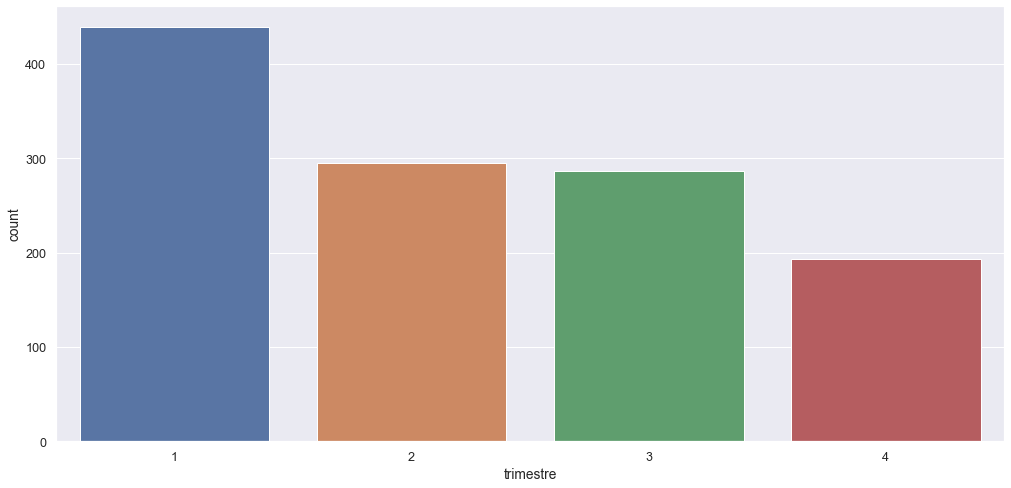

In [27]:
ax = sns.countplot(x="trimestre", data=germany)

In [28]:
germany.to_csv('../../Data/germany.csv', encoding='utf-8')

In [29]:
combined = pd.concat([spain, england, germany, france], axis=0)


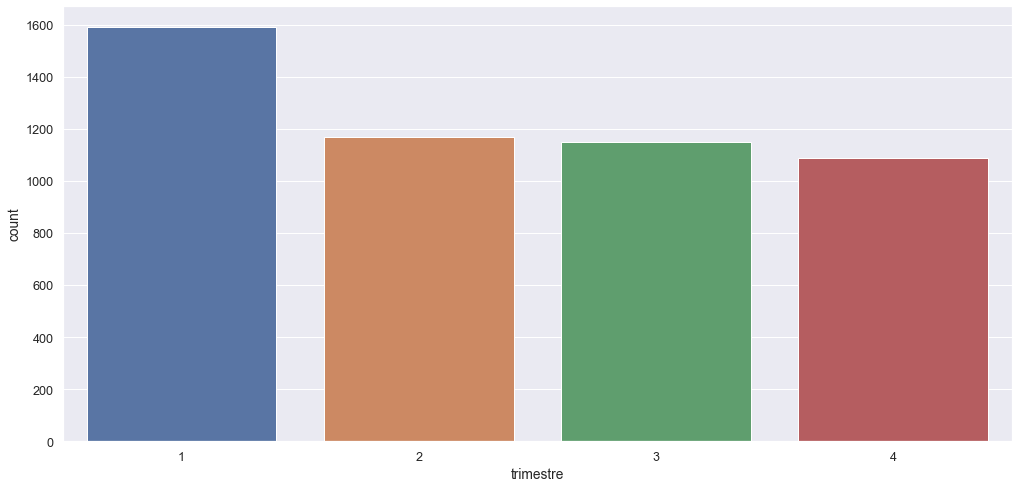

In [30]:
ax = sns.countplot(x="trimestre", data=combined)

In [31]:
combined.to_csv('../../Data/combinedf.csv', encoding='utf-8')

In [32]:
combinedn = pd.concat([spain, englandn, germany, france], axis=0)

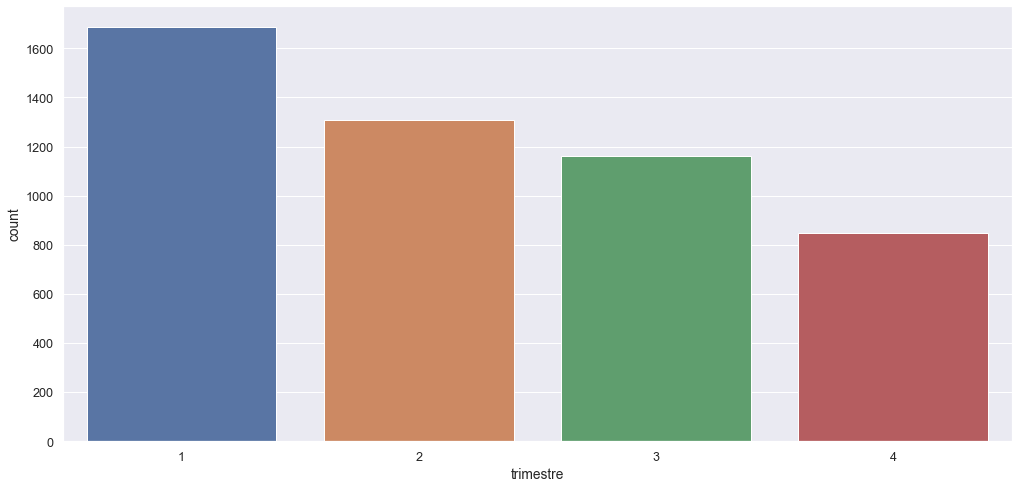

In [33]:
ax = sns.countplot(x="trimestre", data=combinedn)

In [34]:
combinedn.to_csv('../../Data/combinednf.csv', encoding='utf-8')

[Text(0, 0.5, 'Percent')]

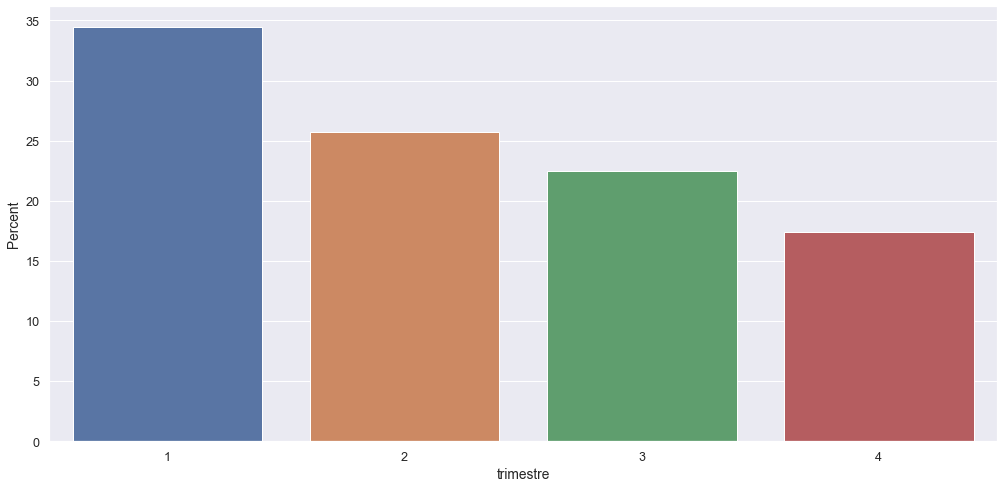

In [46]:
ax = sns.barplot(x="trimestre", y="trimestre", data=spain, estimator=lambda x: len(x) / len(spain) * 100) 
ax.set(ylabel="Percent")

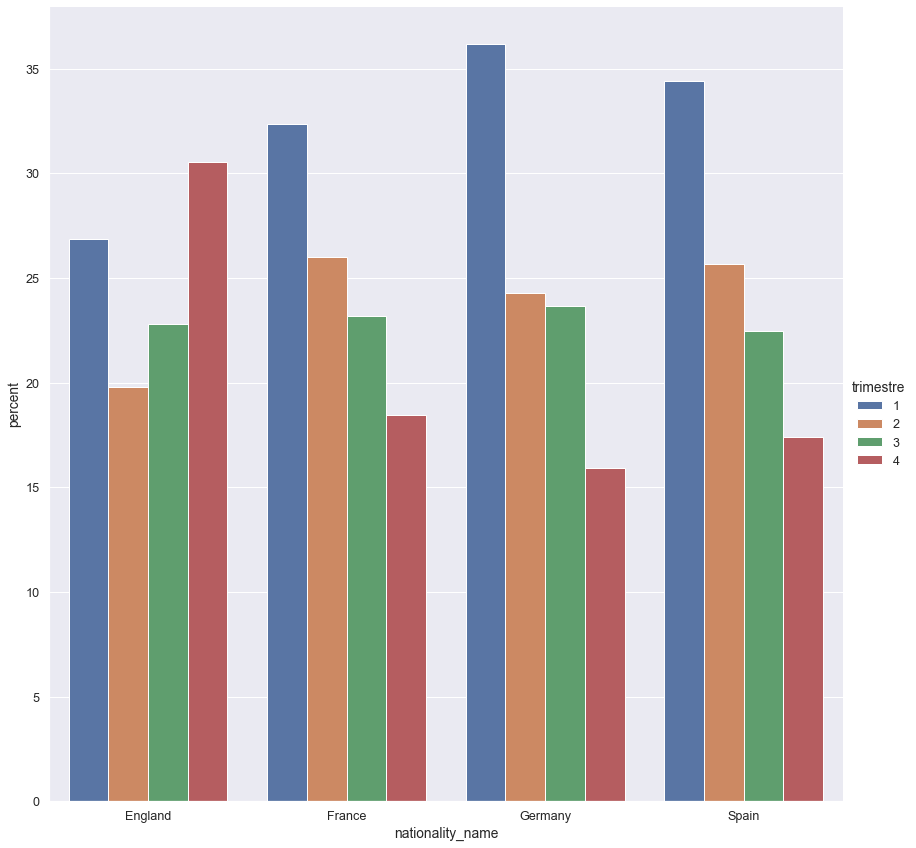

In [43]:
x,y = 'nationality_name', 'trimestre'

(combined
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar',height=12))

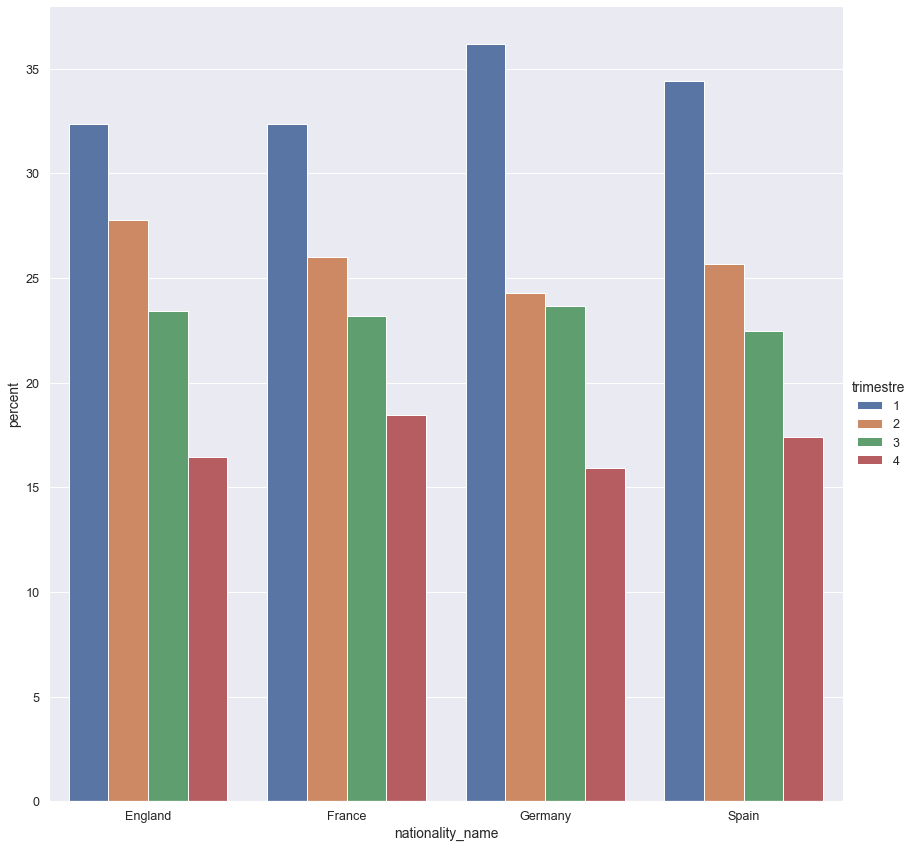

In [44]:
x,y = 'nationality_name', 'trimestre'

(combinedn
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar',height=12))